In [1]:
import pandas as pd

In [2]:
import graph_tool.all as gt
import numpy as np
%matplotlib inline

from matplotlib import pyplot as plt

In [7]:
# generate a barabasi network
graph = gt.price_network(300000, directed=False, m=1)

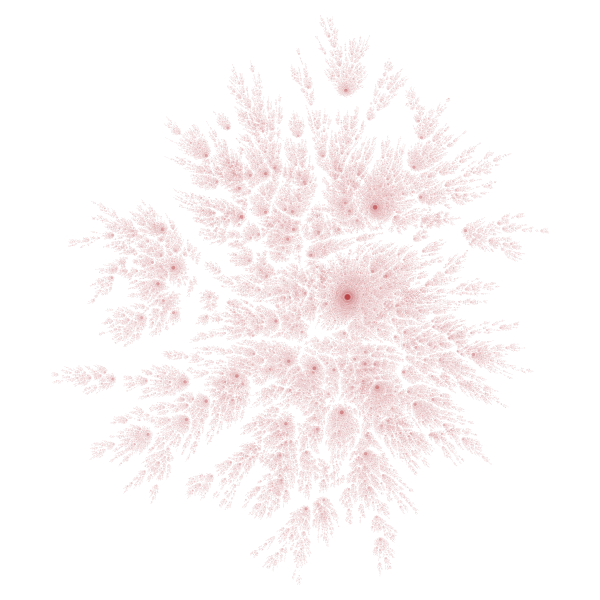

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fa87afc8278, at 0x7fa87b4c7588>

In [8]:
gt.graph_draw(graph, output="barabasi.png")

In [9]:
degrees = [v.out_degree() for v in graph.vertices()]


In [10]:
from collections import Counter

In [11]:
degree_count = Counter(degrees)

In [12]:
x = list(degree_count.keys())
y = list(degree_count.values())

Text(0,0.5,'P(k)')

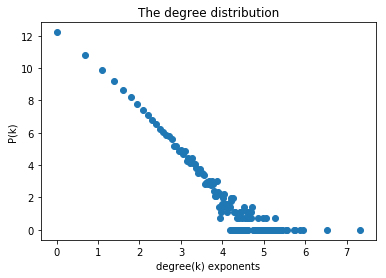

In [13]:
plt.scatter(np.log(x), np.log(y))
plt.title("The degree distribution")
plt.xlabel("degree(k) exponents")
plt.ylabel("P(k)")

## Naive approach

The definition of the clustering coefficient for a complex network is as follows

Let $G = (V,E)$ be a Complex network

$\forall v_i \in V$

$$ C_i = 2 \cdot \frac{e_i}{k_i(k_i − 1)}$$

Where $e_i$ is the number of triangles friends who are also friends of friends
and $k_i(k_i - 1)$ is the total number of friends that could have this property

In [59]:
def number_of_triangles(vertex, graph):
    neighbours = set(vertex.out_neighbours())
    triangles = 0
    for v in neighbours:
        triangles += len(set(v.out_neighbours()) & neighbours)
    return triangles // 2

In [76]:
def local_coef(v, graph):
    vertex = graph.vertex(v)
    num_triangles = number_of_triangles(vertex, graph)
    number_of_triples = vertex.out_degree() * (vertex.out_degree() - 1) / 2
    return num_triangles / number_of_triples if vertex.out_degree() >= 2 else 0

In [35]:
def clustering_coeff_naive(graph):
    coefs = gt.graph_tool.clustering.local_clustering(graph)
    return np.mean(list(coefs.get_array()))

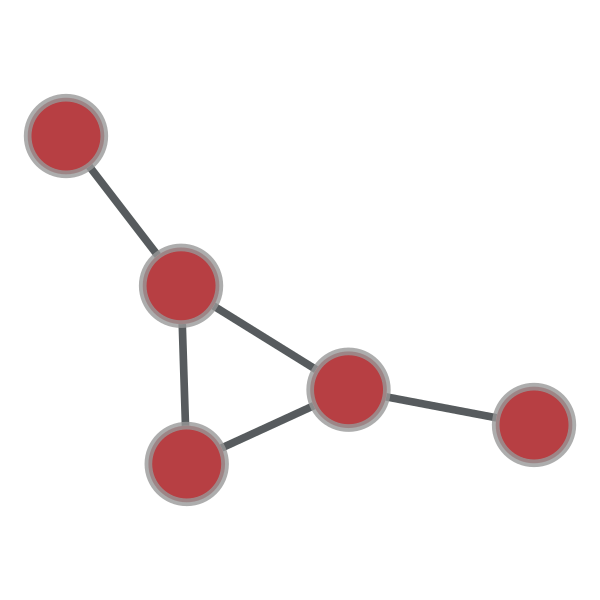

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fa87b399f98, at 0x7fa87b399c18>

In [74]:
gt.graph_draw(graph)

In [78]:
np.mean([local_coef(i, graph) for i in range(len(list(graph.vertices())))])

0.3333333333333333

In [81]:
np.mean(gt.graph_tool.clustering.local_clustering(graph).get_array())

PropertyArray(0.33333333)

In [79]:
gt.graph_tool.clustering.global_clustering(graph)

(0.42857142857142855, 0.13883218797250715)

In [21]:
coefs = gt.graph_tool.clustering.local_clustering(graph)

In [33]:
coefs = list(coefs.get_array())